In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

from blume.process import read, compute
from blume.run import new_folder, save, sweep_T
from blume.model.post_props import Props

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [2]:
chi_range = range(2, 20)
dir = new_folder()

T_c = 2 / np.log(1 + np.sqrt(2))
for chi in chi_range:
    data = sweep_T(
        chi=chi,
        T_range=(T_c, T_c + 0.01),
        step=0.01,
        tol=1e-9,
        max_steps=int(10e8),
        use_prev=False,
        bar=False,
    )
    save(data, dir, msg=False)

In [3]:
mags, chis = [], []
for chi in chi_range:
    data = read(folder=dir, val=chi)
    m = compute(Props.m, data)[0]
    mags.append(m)
    chis.append(chi)

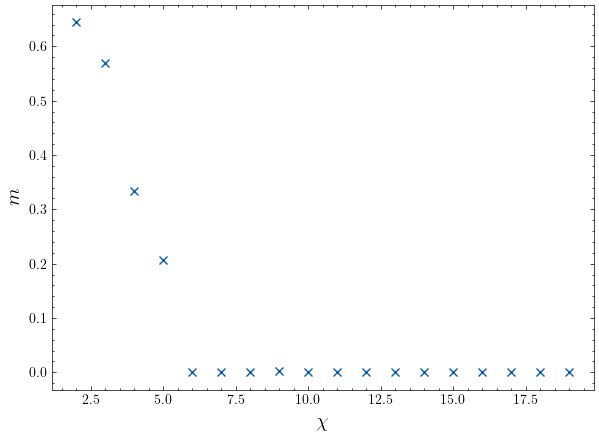

In [4]:
plt.figure(figsize=(7, 5))
plt.plot(chis, mags, "x")
plt.xlabel("$\chi$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.savefig(f"data/{dir}/critical")